# Spare Matrix
by Shahid Hussain

In [65]:
from numpy import loadtxt, count_nonzero, diag, array
from scipy.sparse import csr_matrix
from matplotlib.pyplot import figure, spy, subplot, title
from scipy.linalg import qr, norm, cholesky
from scipy.sparse.csgraph import reverse_cuthill_mckee

I, J, V = loadtxt('./wm1.dat.txt', unpack=True)
I = I - 1
J = J - 1
# convert int
I = I.astype(int)
J = J.astype(int)

In [68]:
A = scipy.sparse.csr_matrix((V, (I,J))).T
A

<277x207 sparse matrix of type '<class 'numpy.float64'>'
	with 2909 stored elements in Compressed Sparse Column format>

In [73]:
# method 1
print(A[0:10, 0:10])
#method 2
print((A[0:10, 0:10]).todense())

# differece is method 1 shows all the non-sparse entries with lhs showing columsn
# method 2 puts all given entries into a matrix, but if the entries is not speicfied on the LHS then just but as 0 

  (0, 0)	0.1
  (2, 0)	0.1
  (3, 0)	0.1
  (5, 0)	-0.1
  (6, 0)	0.1
  (1, 1)	-0.1
  (2, 1)	-0.1
  (2, 2)	-0.1
  (3, 3)	-0.1
  (4, 4)	-0.1
  (5, 5)	-0.1
  (6, 6)	-0.1
  (0, 7)	-0.16799998
  (3, 7)	-0.18924021
  (7, 7)	0.89999998
  (0, 8)	-0.12999999
  (3, 8)	-0.1095698
  (7, 8)	-0.12889999
  (8, 8)	0.84999996
  (0, 9)	0.47999993
  (3, 9)	-0.13181899
  (7, 9)	-0.24382
  (9, 9)	0.84999996
[[ 0.1         0.          0.          0.          0.          0.
   0.         -0.16799998 -0.12999999  0.47999993]
 [ 0.         -0.1         0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.1        -0.1        -0.1         0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.1         0.          0.         -0.1         0.          0.
   0.         -0.18924021 -0.1095698  -0.13181899]
 [ 0.          0.          0.          0.         -0.1         0.
   0.          0.          0.          0.        ]
 [-0.1         0.          0

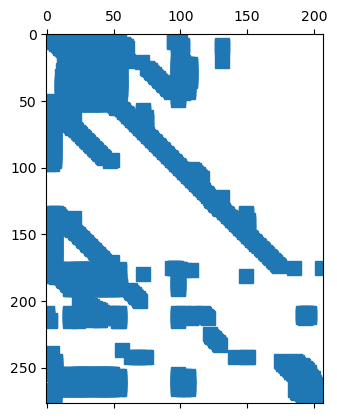

In [74]:
import matplotlib.pyplot as plt

plt.figure()
plt.spy(A)
plt.show()
# all the blue is actual values while the non-blue is 0 elements


In [101]:
A_count_nonzero = A.count_nonzero()
A_matrix = np.array(A.todense())
A_non_zero_percentage = (A_count_nonzero/ (277 * 207))* 100 
A_sparcity_percentage = 100 - A_non_zero_percentage
print(f"the percentage of sparticty in A is {A_sparcity_percentage}")


the percentage of sparticty in A is 94.92666422504752


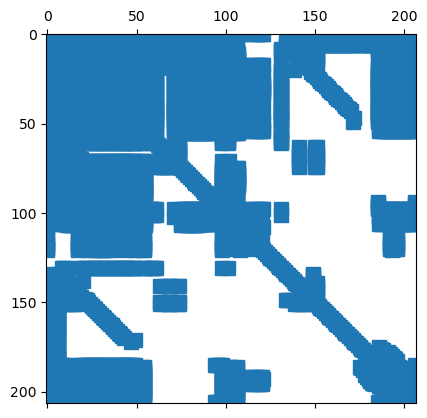

In [124]:
B = A.T * A
plt.figure()
plt.spy(B)
plt.show()

In [126]:
B_matrix = B.todense()
B_count_nonzero = B.count_nonzero()
print(np.shape(B_matrix))
print(B_count_nonzero)
B_non_zero_percentage = (B_count_nonzero/ (207 * 207)) * 100 
B_sparcity_percentage = 100 - B_non_zero_percentage
print(f"the percentage of sparticty in B is {B_sparcity_percentage}")

(207, 207)
8805
the percentage of sparticty in B is 79.45109570818455


In [142]:
# h - cholesky 
RO = scipy.linalg.cholesky(B_matrix)
print(type(RO))
print(np.shape(RO))
RO_count_nonzero = np.count_nonzero(RO)
RO_non_sparticty_percentage = (RO_count_nonzero / (207 * 207 ))* 100 
sparicty_RO = 100 - RO_non_sparticty_percentage
print(f"the sparcity of RO is {sparicty_RO}")

<class 'numpy.ndarray'>
(207, 207)
the sparcity of RO is 57.473920044808516


In [168]:
# getting non-zero elements of B and RO
B_nonzero_matrix = B.data.reshape(8805, 1)
RO_csr = csr_matrix(RO)
print(len(RO_csr.data))


18222


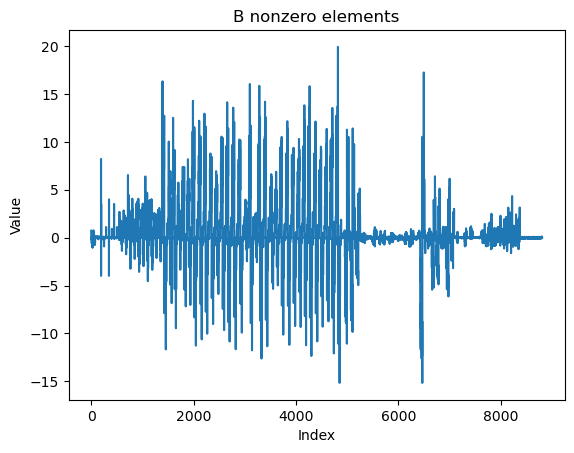

In [173]:
x = np.arange(0, 8805)

plt.figure()
plt.plot(x, B_nonzero_matrix)
plt.title("B nonzero elements")
plt.xlabel("Index")
plt.ylabel("Value")
plt.show()


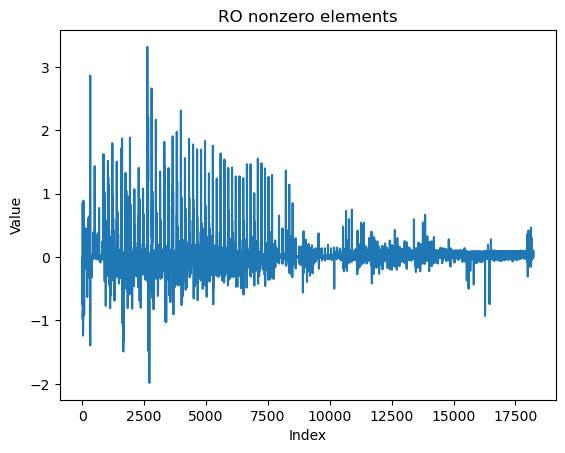

In [177]:
x_ro = np.arange(0, 18222)
plt.figure()
plt.plot(x_ro, RO_csr.data.reshape(18222, 1))
plt.title("RO nonzero elements")
plt.xlabel("Index")
plt.ylabel("Value")
plt.show()

In [183]:
from scipy.sparse.csgraph import reverse_cuthill_mckee

print(f"The original matrix B in CSR form:\n{B}")
p = reverse_cuthill_mckee(B)
print(f"The original matrix B in Reverse Cuthill Mckee Form:\n{p}")


The original matrix B in CSR form:
  (0, 0)	0.7239131681648134
  (0, 1)	-0.035734522429004004
  (0, 2)	-0.010000000000000002
  (0, 3)	-0.0200219940043984
  (0, 5)	0.010000000000000002
  (0, 6)	-0.010000000000000002
  (0, 7)	-0.14090096800000002
  (0, 8)	-0.07607612200000001
  (0, 9)	-0.12211139500000001
  (0, 10)	-0.06770541199999999
  (0, 16)	-0.076323867
  (0, 17)	-0.6064900304658767
  (0, 18)	-0.039059103000000005
  (0, 19)	-0.115257655
  (0, 20)	-0.27180982000000004
  (0, 21)	-0.08999999600000001
  (0, 22)	-0.297236747
  (0, 23)	-0.6424499151905695
  (0, 24)	-0.104219018
  (0, 25)	-0.5381166240780287
  (0, 26)	-0.10757012600000002
  (0, 27)	-0.8374441036570875
  (0, 28)	-0.141961001
  (0, 29)	-0.726987636906368
  (0, 30)	-0.8218925083542251
  :	:
  (205, 46)	-0.01370787756
  (205, 47)	-0.08259956245
  (205, 48)	-0.010544606040000001
  (205, 49)	-0.07925974798
  (205, 53)	0.029392005960000002
  (205, 54)	0.01292799596
  (205, 98)	0.06059999899000001
  (205, 102)	0.012251298990000001

[[ 0.14142136]
 [-0.07071068]
 [ 0.1       ]
 ...
 [ 0.14142136]
 [ 0.1       ]
 [ 0.14142136]]


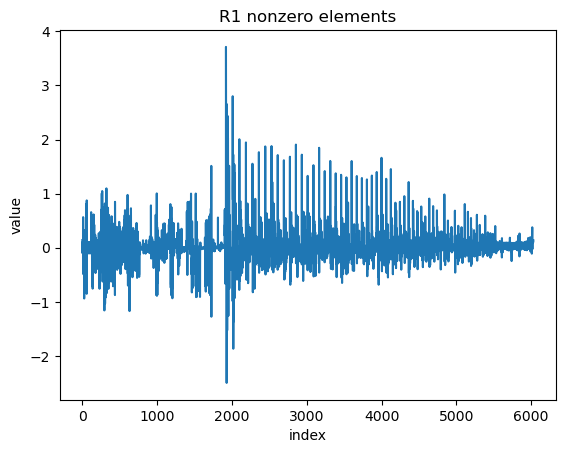

In [206]:
p1 = p.reshape(207,1)
R1 = cholesky(B_matrix[p1, p])
# convert to find all nonzero 
x_p = np.arange(0, 6028)
print(np.reshape(scipy.sparse.csr_matrix(R1).data, (6028, 1)))

plt.figure()
plt.plot(x_p,np.reshape(scipy.sparse.csr_matrix(R1).data, (6028, 1)))
plt.title('R1 nonzero elements')
plt.xlabel('index')
plt.ylabel('value')
plt.show()

In [207]:
np.shape(B_matrix[p1, p])

(207, 207)

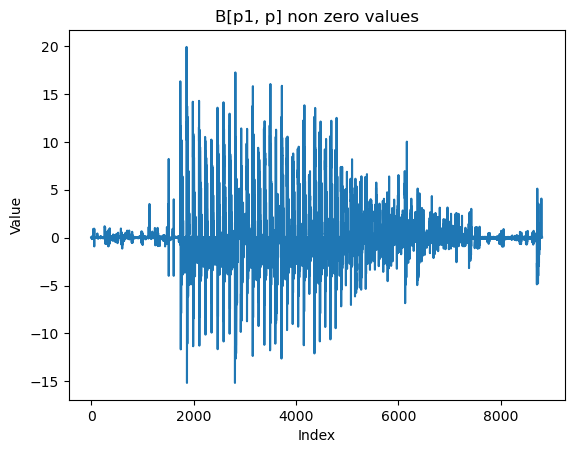

In [216]:
x_b = np.arange(0, 8805)
plt.figure()
plt.plot(x_b, np.reshape(scipy.sparse.csr_matrix(B_matrix[p1, p]).data, (8805, 1)))
plt.title('B[p1, p] non zero values')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()

In [221]:
# sparicty of R1
print(R1)
R1_count_nonzero = np.count_nonzero(R1)
non_sparcity_percentage = (R1_count_nonzero / (207 * 207))* 100 
sparcity_percentage_R1 = 100 - non_sparcity_percentage
print(f'The sparcity in R1 is {sparcity_percentage_R1}')

[[0.14142136 0.         0.         ... 0.         0.         0.        ]
 [0.         0.1        0.         ... 0.         0.         0.        ]
 [0.         0.         0.1        ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.14142136 0.         0.        ]
 [0.         0.         0.         ... 0.         0.1        0.        ]
 [0.         0.         0.         ... 0.         0.         0.14142136]]
The sparcity in R1 is 85.93199374547831


# Comparing Sparcity of R1 and R0
R0 is calculated used Caluating a normal B matrix without any permutaiton, thus we would expect the fill-in to be high, thus sparicty to be low when doing any elimination/ factorsiation on B, which increases sotriage space requirement and computational efficiency.
ALternatively, R1 calcualtes cholesky factorisation using a permuation of B which is found thoruhg revers cuthill mckee algorithm , due to this permutation of B we expect the algorithm have higher sparcity then R0 and thus be more computationally efficiecny and meoemry efficient!
For R0 we got 57% 
For R1 we got 85% 
Thus our conclusion if correct!

# Question 2 QR factorisation sparicty of permuation vs non permutation

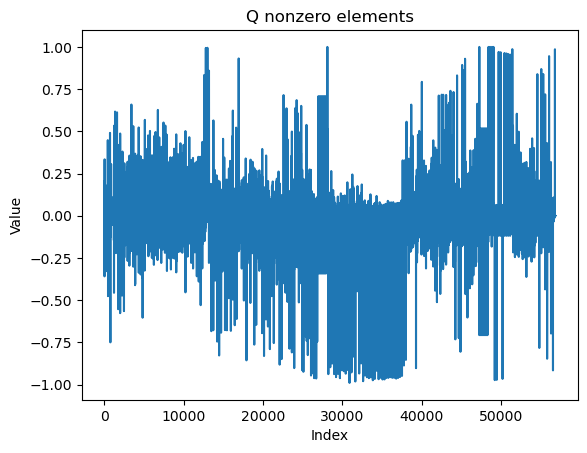

In [235]:
# QR factorisation of A which is csr compressed
Q, RF = scipy.linalg.qr(A.todense())
# finding all non zero elements and ploting for Q, RF
Q_nonzero_arr = np.reshape(scipy.sparse.csr_matrix(Q).data, (56831,1))
x_q = np.arange(0 , 56831)

plt.figure()
plt.plot(x_q,Q_nonzero_arr)
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Q nonzero elements')
plt.show()


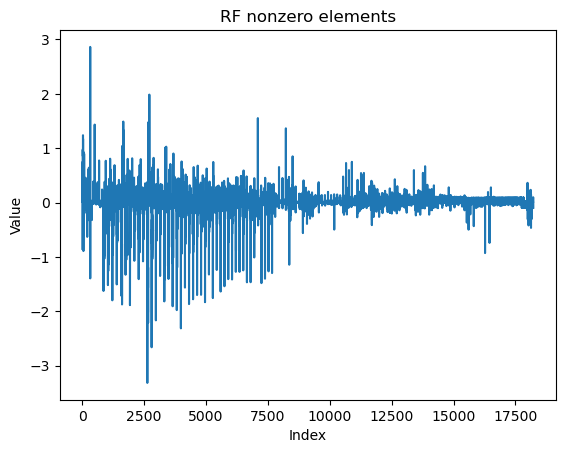

In [237]:
RF_nonzero_arr = np.reshape(scipy.sparse.csr_matrix(RF).data, (18222, 1))
x_rf = np.arange(0, 18222)

plt.figure()
plt.plot(x_rf, RF_nonzero_arr)
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('RF nonzero elements')
plt.show()

In [245]:
# extract n by n matrix from RF
print(np.shape(RF))
# since the shape of RF is (277, 207) at matrix a sqaure matrix is 207 by 207 
R = RF[0:207, 0:207]

norm_diff_R0_R = np.linalg.norm(RO - R, 1)
norm_diff_B_R_R_T = np.linalg.norm(B- R.T * R, 1)
print(f"The norm : ||R - RO||_1 is {norm_diff_R0_R} and ||B - R.T R||_1 {norm_diff_B_R_R_T}")


(277, 207)
The norm : ||R - RO||_1 is 41.14817487975804 and ||B - R.T R||_1 424.59129784592403
